# Housing Prices - Advanced Regression Techniques 

### James Mwakichako - jmwakich@hawk.iit.edu
### Michael Baroody  - mbaroody@hawk.iit.edu

### Description 

This projects attemps to predict the final sale price of a home given certain features of houses such as square footage, pool area, if it has a second floor or not. In total, there are 76 features and the final sale price with is the target. 

In [15]:
%matplotlib inline

import pandas as pd
from ipywidgets import widgets
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("train.csv", header = 0)

In [3]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
train.shape

(1460, 81)

# Visualization of Final Sale Price vs. Features

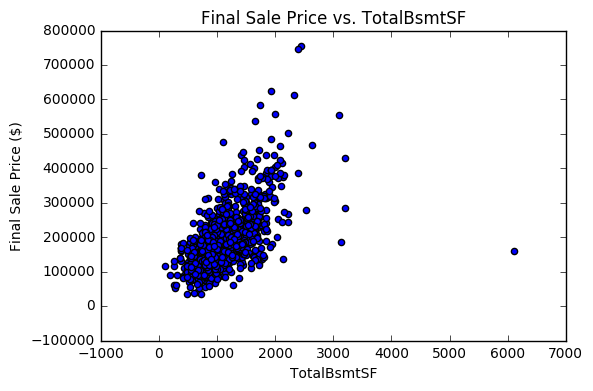

<function __main__.display_stats>

In [14]:
# find numerical features only
#num_features = [num_feature for num_feature in train.columns.values if train[num_feature].dtype == 'int64']
features = [feature for feature in train.columns.values]

features_dropdown = widgets.Dropdown(
    options=features,
    value='TotalBsmtSF',
    description='Feature',
    disabled=False,
    button_style='info' # 'success', 'info', 'warning', 'danger' or ''
)

categorical_features = [cat_feature for cat_feature in train.columns.values if train[cat_feature].dtype == 'object']
categorical_features.extend(['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 
                             'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
                             'TotRmsAbvGr', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold'])


def display_stats(feature):
    
    if feature in categorical_features:
        labels = np.unique(train[feature].apply(lambda x: str(x)).values)
        data = {str(l): list() for l in labels}
        for idx, val in enumerate(train['SalePrice'].values):
            data[str(train[feature].values[idx])].append(val)
        data = [d[1] for d in sorted(list(data.items()), key=lambda x: x[0])]
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        ax.set_title('Final Sale Price vs. %s' % feature)
        ax.set_xlabel(feature)
        ax.set_ylabel('Final Sale Price ($)')
        ax.boxplot(data, labels=labels)
        plt.show()
    else:
        x = train[feature].values
        y = train['SalePrice'].values
    
        #find zero indices
        zero_indices = np.where(x == 0)[0]
        #delete these datapoints from x and y
    
        x = np.delete(x, zero_indices)
        y = np.delete(y, zero_indices)
    
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        ax.set_title('Final Sale Price vs. %s' % feature)
        ax.set_xlabel(feature)
        ax.set_ylabel('Final Sale Price ($)')

        ax.scatter(x, y)
        plt.show()

widgets.interact(display_stats, feature=features_dropdown)




In [104]:
train.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'Pav

In [6]:
missing_perc=train.apply(lambda x: 100*(1-x.count().sum()/(1.0*len(x))))
sorted_missing = missing_perc.sort_values(ascending = False)
sorted_missing



PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
LotFrontage      17.739726
GarageCond        5.547945
GarageType        5.547945
GarageYrBlt       5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtExposure      2.602740
BsmtFinType2      2.602740
BsmtFinType1      2.534247
BsmtCond          2.534247
BsmtQual          2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
Utilities         0.000000
YearRemodAdd      0.000000
MSSubClass        0.000000
Foundation        0.000000
ExterCond         0.000000
ExterQual         0.000000
Exterior2nd       0.000000
Exterior1st       0.000000
RoofMatl          0.000000
RoofStyle         0.000000
YearBuilt         0.000000
                   ...    
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
3SsnPorch         0.000000
BsmtUnfSF         0.000000
S

In [7]:
del train['MiscFeature']
del train['Alley']
del train['Fence']
del train['PoolQC']
del train['FireplaceQu']

In [8]:
train.shape

(1460, 76)

In [11]:
train.to_csv('train_clean_1.csv', index=False)

In [12]:
train = train.fillna(train.mean())

In [13]:
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
